# 数据分析

In [149]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels import PanelOLS

## 读取数据

In [150]:
# 读取数据
df = pd.read_excel("./final_data.xls")
# 查看数据概况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stk_cd  11700 non-null  int64  
 1   CSR     11700 non-null  float64
 2   BP      11700 non-null  float64
 3   SOE     11700 non-null  float64
 4   SIZE    11700 non-null  float64
 5   LEV     11700 non-null  float64
 6   YEAR    11700 non-null  int64  
 7   IND     11700 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 731.4 KB


In [151]:
# 创建虚拟变量（年份）
year_dummies = pd.get_dummies(df['YEAR'], prefix='YEAR', drop_first=True)
# 合并虚拟变量到原始数据
data_with_dummies = pd.concat([df, year_dummies], axis=1)
# 设置双重索引
data_with_dummies = data_with_dummies.set_index(["Stk_cd", "YEAR"])

In [152]:
print(data_with_dummies)

               CSR        BP  SOE       SIZE       LEV  IND  YEAR_2017  \
Stk_cd YEAR                                                              
2      2016  76.52  0.824792  0.0  27.351214  0.810123    0          0   
4      2016  21.30  0.330957  0.0  19.759923  0.552979    1          0   
5      2016  16.33  0.015196  0.0  21.647456  0.462232    0          0   
6      2016  63.26  0.012753  0.0  23.359293  0.681010    0          0   
7      2016  10.14  0.124470  0.0  20.069592  0.195184    0          0   
...            ...       ...  ...        ...       ...  ...        ...   
603988 2020  28.11  0.950113  0.0  21.002087  0.426588    1          0   
603989 2020  25.51  0.778381  0.0  22.078823  0.334527    1          0   
603997 2020   7.29 -0.361137  0.0  23.579522  0.754537    1          0   
603998 2020  27.31  0.191148  0.0  21.448076  0.408192    1          0   
603999 2020  16.20  0.131931  0.0  21.472300  0.167235    0          0   

             YEAR_2018  YEAR_2019  YE

## 描述性分析和相关性分析

                CSR            BP           SOE          SIZE           LEV  \
count  11700.000000  11700.000000  11700.000000  11700.000000  11700.000000   
mean      21.238702      0.273970      0.023168     22.525740      0.424409   
std       12.172811      0.691802      0.089715      1.323044      0.200783   
min      -18.450000    -21.777783      0.000000     15.921008      0.006171   
25%       15.540000      0.059975      0.000000     21.618876      0.266016   
50%       21.065000      0.177736      0.000000     22.350151      0.417116   
75%       26.180000      0.386080      0.000000     23.243055      0.571146   
max       87.020000     26.888565      0.841543     28.624722      1.230893   

                IND     YEAR_2017     YEAR_2018     YEAR_2019     YEAR_2020  
count  11700.000000  11700.000000  11700.000000  11700.000000  11700.000000  
mean       0.630171      0.200000      0.200000      0.200000      0.200000  
std        0.482779      0.400017      0.400017      0

<AxesSubplot:>

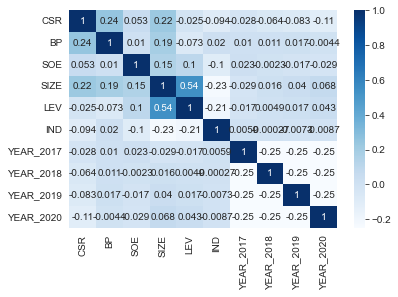

In [153]:
# # 描述性分析
# print(df.describe())
# # 相关性分析
# print(df.corr())
# # 绘制相关性热图
# import seaborn as sns
# sns.heatmap(df.corr(), annot=True, cmap="Blues")
# 描述性分析
print(data_with_dummies.describe())
# 相关性分析
print(data_with_dummies.corr())
# 绘制相关性热图
import seaborn as sns
sns.heatmap(data_with_dummies.corr(), annot=True, cmap="Blues")

## 固定效应模型

In [154]:
# 建立固定效应模型
model_fe = PanelOLS(data_with_dummies['BP'],
                    data_with_dummies[
                        ['CSR', 'SIZE', 'LEV', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020']],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
# 拟合模型
results_fe = model_fe.fit()
# 查看回归结果
results_fe.summary

Dep. Variable:,BP,R-squared:,0.0462
Estimator:,PanelOLS,R-squared (Between):,-29.057
No. Observations:,11700,R-squared (Within):,0.0462
Date:,"Sat, May 20 2023",R-squared (Overall):,-19.067
Time:,13:56:05,Log-likelihood,-6610.5
Cov. Estimator:,Unadjusted,,
,,F-statistic:,50.288
Entities:,2340,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(9,9351)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,50.288


## 随机效应模型

In [155]:
from linearmodels import RandomEffects

# 建立随机效应模型
model_re = RandomEffects(data_with_dummies['BP'],
                         data_with_dummies[
                             ['CSR', 'SIZE', 'LEV', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020']])
# 拟合模型
results_re = model_re.fit()
# 查看回归结果
results_re.summary

Dep. Variable:,BP,R-squared:,0.0986
Estimator:,RandomEffects,R-squared (Between):,0.2713
No. Observations:,11700,R-squared (Within):,0.0350
Date:,"Sat, May 20 2023",R-squared (Overall):,0.1902
Time:,13:56:06,Log-likelihood,-8113.7
Cov. Estimator:,Unadjusted,,
,,F-statistic:,142.09
Entities:,2340,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(9,11691)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,142.09


## 稳健性检验

In [156]:
robust_fe_results = model_fe.fit(cov_type='robust')
print(robust_fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     BP   R-squared:                        0.0462
Estimator:                   PanelOLS   R-squared (Between):             -29.057
No. Observations:               11700   R-squared (Within):               0.0462
Date:                Sat, May 20 2023   R-squared (Overall):             -19.067
Time:                        13:56:06   Log-likelihood                   -6610.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      50.288
Entities:                        2340   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                  F(9,9351)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             30.790
                            

## B-P 检验

In [157]:
from statsmodels.stats.diagnostic import het_breuschpagan

# 读取回归模型的残差和预测值
residuals = results_fe.resids

# 获取预测值
predicted_values = results_fe.predict()

# 进行B-P检验
bp_test = het_breuschpagan(residuals, sm.add_constant(predicted_values))

# 输出B-P检验结果
print("BP Test Statistic:", bp_test[0])
print("BP p-value:", bp_test[1])
print("BP Test Results:", bp_test[2:])

BP Test Statistic: 21.576969639301915
BP p-value: 3.3990899584386606e-06
BP Test Results: (21.61313990633554, 3.3720717389842964e-06)


## 进行Hausman检验

In [158]:
# Hausman检验
from linearmodels.panel import compare

comparison = compare({'FE': results_fe, 'RE': results_re})
print(comparison.summary)

                    Model Comparison                    
                                    FE                RE
--------------------------------------------------------
Dep. Variable                       BP                BP
Estimator                     PanelOLS     RandomEffects
No. Observations                 11700             11700
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.0462            0.0986
R-Squared (Within)              0.0462            0.0350
R-Squared (Between)            -29.057            0.2713
R-Squared (Overall)            -19.067            0.1902
F-statistic                     50.288            142.09
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
CSR                             0.0061            0.0086
                              (11.712)          (17.307)
SIZE                            0.1635            0.0096
                              (

In [159]:
# 1. 运用计量书本上的公式，自编函数， 因为目前 Python 里面没有现成的模块
import numpy.linalg as la
from scipy import stats


def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval


# 2. 将fe,re结果带入自编函数之中。
hausman_results = hausman(results_fe, results_re)
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

# 3. 看结果，如果这儿的 p-Value 小于 10%，则支持 固定效应 模型。

chi-Squared: 324.6296616958815
degrees of freedom: 9
p-Value: 1.540216379345982e-64
